# **D212 Data Mining II** | Task 1: Clustering Techniques

In [2]:
import pandas as pd #dataframes
import numpy as np #arrays
import seaborn as sns #visualizations

In [3]:
from matplotlib import pyplot as plt #visualizations

In [4]:
df = pd.read_csv('churn_clean.csv')
df.head(3)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3


In [5]:
# drop irrelavant columns

df.drop(columns=['CaseOrder', 
                 'Customer_id', 
                 'Interaction', 
                 'UID', 
                 'City', 
                 'State', 
                 'County', 
                 'Zip', 
                 'Lat', 
                 'Lng', 
                 'Area', 
                 'TimeZone', 
                 'Email', 
                 'Item1', 
                 'Item2', 
                 'Item3', 
                 'Item4', 
                 'Item5', 
                 'Item6', 
                 'Item7', 
                 'Item8'], 
        inplace=True)
df.head()

,Population,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Contacts,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,0,...,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110
1,10446,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,0,...,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,3735,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,0,...,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961
3,13863,Solicitor,1,48,18925.23,Married,Male,No,14.913540,2,...,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412
4,11352,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,2,...,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436


## **Exploration**

<Axes: xlabel='Age', ylabel='Bandwidth_GB_Year'>

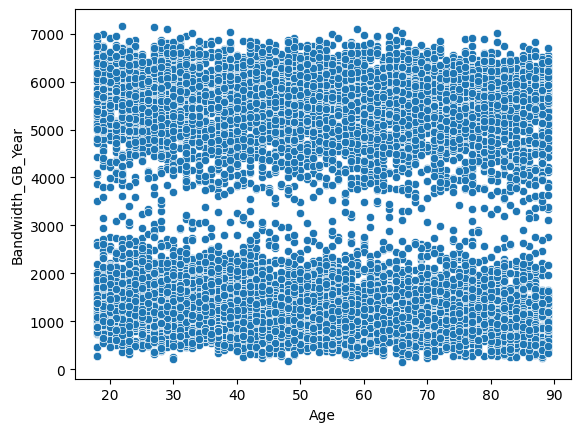

In [6]:
sns.scatterplot(data=df, x="Age", y="Bandwidth_GB_Year")

<Axes: xlabel='Age', ylabel='Tenure'>

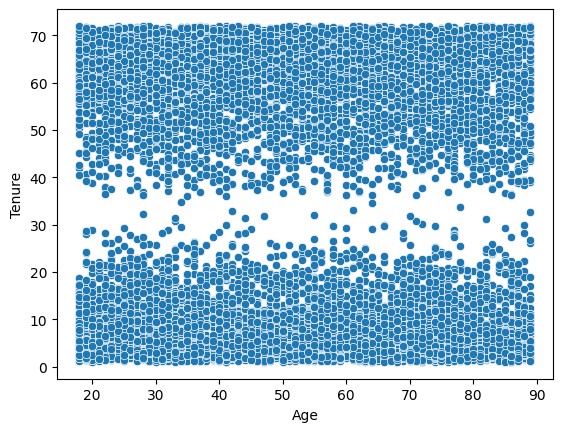

In [7]:
sns.scatterplot(data=df, x="Age", y="Tenure")

<Axes: xlabel='Income', ylabel='Bandwidth_GB_Year'>

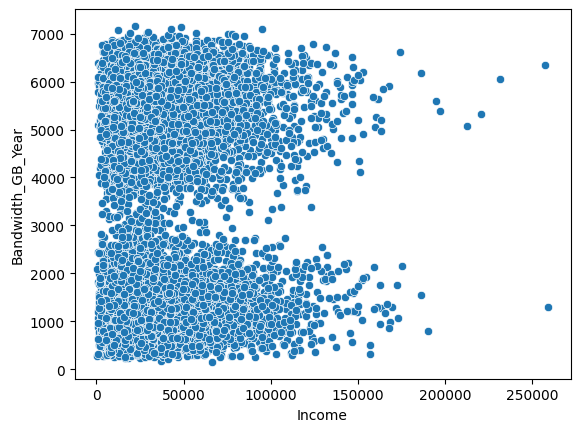

In [8]:
sns.scatterplot(data=df, x="Income", y="Bandwidth_GB_Year")

<Axes: xlabel='Tenure', ylabel='MonthlyCharge'>

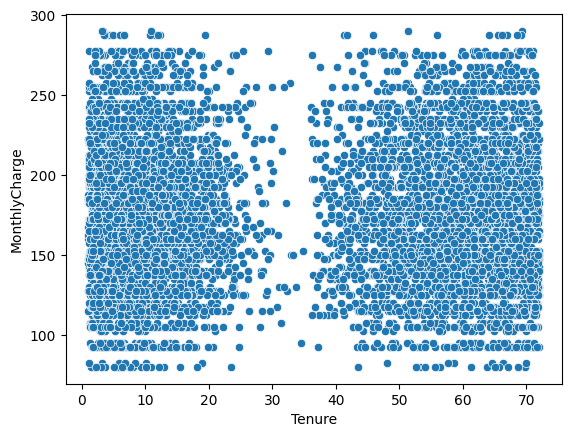

In [9]:
sns.scatterplot(data=df, x="Tenure", y="MonthlyCharge")

<Axes: xlabel='Tenure', ylabel='Bandwidth_GB_Year'>

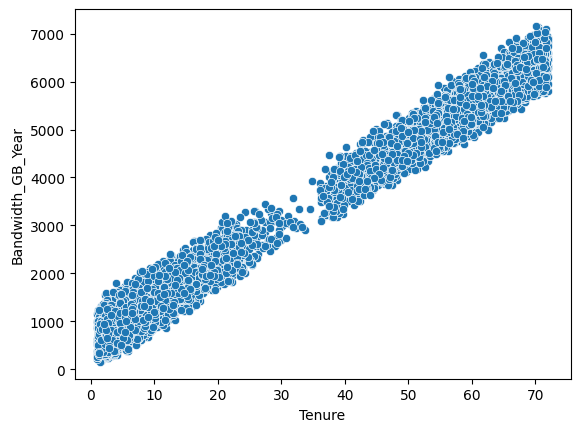

In [10]:
sns.scatterplot(data=df, x="Tenure", y="Bandwidth_GB_Year")

<Axes: xlabel='Income', ylabel='Tenure'>

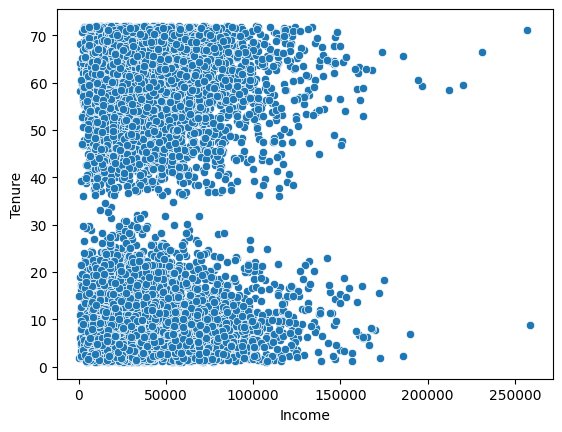

In [11]:
sns.scatterplot(data=df, x="Income", y="Tenure")

<Axes: xlabel='Age', ylabel='Income'>

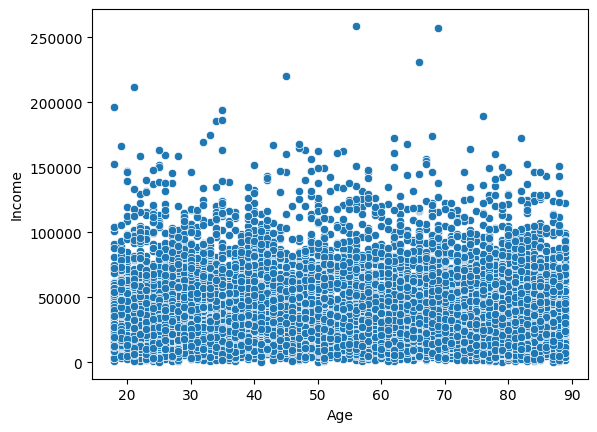

In [12]:
sns.scatterplot(data=df, x="Age", y="Income")

<Axes: xlabel='Population', ylabel='Income'>

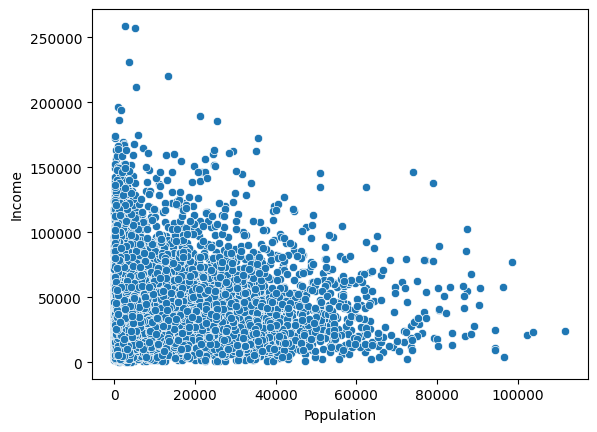

In [13]:
sns.scatterplot(data=df, x="Population", y="Income")

# **income vs tenure**
- there appears to be two distinct, circular clusters
- now, choose variables that are relavant to income vs tenure

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  int64  
 1   Job                   10000 non-null  object 
 2   Children              10000 non-null  int64  
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Marital               10000 non-null  object 
 6   Gender                10000 non-null  object 
 7   Churn                 10000 non-null  object 
 8   Outage_sec_perweek    10000 non-null  float64
 9   Contacts              10000 non-null  int64  
 10  Yearly_equip_failure  10000 non-null  int64  
 11  Techie                10000 non-null  object 
 12  Contract              10000 non-null  object 
 13  Port_modem            10000 non-null  object 
 14  Tablet                10000 non-null  object 
 15  InternetService     

In [15]:
df.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,0.994200,0.398000,34.526188,172.624816,3392.341550
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.000000,0.0000,18.000000,348.670000,0.099747,0.000000,0.000000,1.000259,79.978860,155.506715
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,2.000000,1.000000,61.479795,200.734725,5586.141370
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,7.000000,6.000000,71.999280,290.160419,7158.981530


In [16]:
df.describe(include=object)

,Job,Marital,Gender,Churn,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
count,10000,10000,10000,10000,10000,10000,10000,10000,7871,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,639,5,3,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,4
top,Occupational psychologist,Divorced,Female,No,No,Month-to-month,No,No,Fiber Optic,Yes,No,No,No,No,No,No,No,Yes,Electronic Check
freq,30,2092,5025,7350,8321,5456,5166,7009,4408,9067,5392,6424,5494,5614,6250,5071,5110,5882,3398


### **Features relevant to income vs tenure**
- bandwidth and tenure are highly correlated so I will not include bandwidth

In [17]:


df_2 = df[['Income',
    'Tenure',
    'Children',
    'Age',
    'MonthlyCharge',
    'Marital',
    'Gender',
    'Churn',
    'Contract']]

df_2.head(3)

,Income,Tenure,Children,Age,MonthlyCharge,Marital,Gender,Churn,Contract
0,28561.99,6.795513,0,68,172.455519,Widowed,Male,No,One year
1,21704.77,1.156681,1,27,242.632554,Married,Female,Yes,Month-to-month
2,9609.57,15.754144,4,50,159.947583,Widowed,Female,No,Two Year


In [18]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Income         10000 non-null  float64
 1   Tenure         10000 non-null  float64
 2   Children       10000 non-null  int64  
 3   Age            10000 non-null  int64  
 4   MonthlyCharge  10000 non-null  float64
 5   Marital        10000 non-null  object 
 6   Gender         10000 non-null  object 
 7   Churn          10000 non-null  object 
 8   Contract       10000 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 703.2+ KB


In [19]:
df_2.describe().round(2)

,Income,Tenure,Children,Age,MonthlyCharge
count,10000.00,10000.00,10000.00,10000.00,10000.00
mean,39806.93,34.53,2.09,53.08,172.62
std,28199.92,26.44,2.15,20.70,42.94
min,348.67,1.00,0.00,18.00,79.98
25%,19224.72,7.92,0.00,35.00,139.98
50%,33170.60,35.43,1.00,53.00,167.48
75%,53246.17,61.48,3.00,71.00,200.73
max,258900.70,72.00,10.00,89.00,290.16


In [20]:
df_2.describe(include=object)

,Marital,Gender,Churn,Contract
count,10000,10000,10000,10000
unique,5,3,2,3
top,Divorced,Female,No,Month-to-month
freq,2092,5025,7350,5456


# **Preprocessing**

In [21]:
df[['Income', 'Tenure']].head()

,Income,Tenure
0,28561.99,6.795513
1,21704.77,1.156681
2,9609.57,15.754144
3,18925.23,17.087227
4,40074.19,1.670972


In [22]:
# Normalize the data using StandardScaler from sklearn

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
#scaled data frame

scaled_df_2 = scaler.fit_transform(df_2[['Income', 'Tenure']])


In [24]:
scaled_df_2 = pd.DataFrame(scaled_df_2, columns = ['Income', 'Tenure'])
scaled_df_2.head()

,Income,Tenure
0,-0.398778,-1.048746
1,-0.641954,-1.262001
2,-1.070885,-0.709940
3,-0.740525,-0.659524
4,0.009478,-1.242551


In [25]:
scaled_df_2.describe().round(2)

,Income,Tenure
count,10000.00,10000.00
mean,0.00,0.00
std,1.00,1.00
min,-1.40,-1.27
25%,-0.73,-1.01
50%,-0.24,0.03
75%,0.48,1.02
max,7.77,1.42


In [26]:
scaled_df_2.to_csv('scaled_dataframe_income_tenure.csv', index=False)

# **KMeans Clustering**
- from the scatterplot, I observe two distinct clusters
- next, I will find the optimal number of clusters and adjust the model

In [27]:
from sklearn.cluster import KMeans #package to perform KMeans clustering 

k_model = KMeans(n_clusters = 2, n_init = 25, random_state = 496)
k_model.fit(scaled_df_2)

KMeans(n_clusters=2, n_init=25, random_state=496)

In [28]:
# evaluate the model

evaluate = pd.Series(k_model.labels_).value_counts()
evaluate

0    5001
1    4999
Name: count, dtype: int64

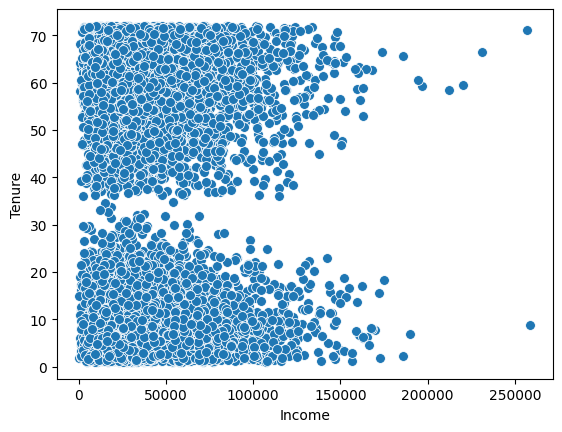

In [29]:
ax = sns.scatterplot(data = df_2,
                    x= 'Income',
                    y= 'Tenure',
                    s = 50)

In [30]:
# Centroids

centeroid = pd.DataFrame(k_model.cluster_centers_, columns = ['Income', 'Tenure'])
centeroid

,Income,Tenure
0,0.001789,0.960343
1,-0.001790,-0.960727


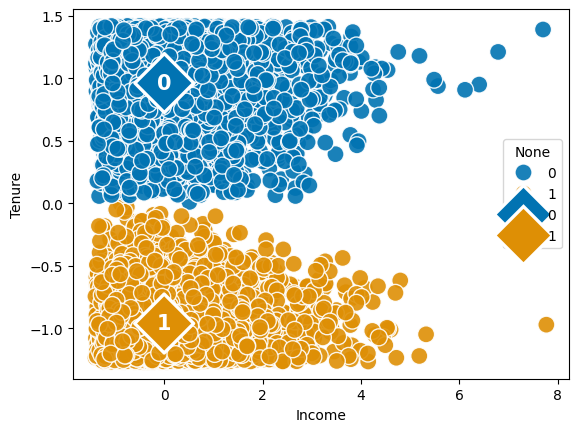

In [31]:
plt.figure()

ax = sns.scatterplot(data = scaled_df_2,
                    x = 'Income',
                    y = 'Tenure',
                    hue = k_model.labels_,
                    palette = 'colorblind',
                    alpha = 0.9,
                    s = 150,
                    legend = True)

ax = sns.scatterplot(data = centeroid,
                    x = 'Income',
                    y = 'Tenure',
                    hue = centeroid.index,
                    palette = 'colorblind',
                    s = 900,
                    marker = 'D')

for i in range(len(centeroid)):
    plt.text(x = centeroid.Income[i],
            y = centeroid.Tenure[i],
            s = i,
            horizontalalignment = 'center',
            verticalalignment = 'center',
            size = 15,
            weight = 'bold',
            color = 'white')

### now look at k optimal values for cluster

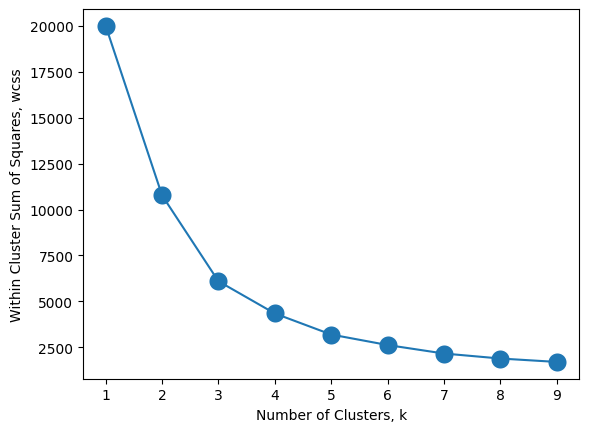

In [32]:
wcss = []

for k in range(1, 10):
    model = KMeans(n_clusters = k, n_init = 50, random_state = 496)
    model.fit(scaled_df_2)
    wcss.append(model.inertia_)
wcss_s = pd.Series(wcss, index = range(1, 10))

plt.figure()
ax = sns.lineplot(y=wcss_s, x = wcss_s.index)
ax = sns.scatterplot(y=wcss_s, x = wcss_s.index, s=200)
ax = ax.set(xlabel = 'Number of Clusters, k', 
            ylabel = 'Within Cluster Sum of Squares, wcss')

In [33]:
inertia_scores = []

for k in range(1, 10):
    model = KMeans(n_clusters = k, n_init = 50, random_state = 496)
    model.fit(scaled_df_2)
    inertia_scores.append(model.inertia_)

inertia_scores

[20000.000000000004,
 10773.690844167608,
 6097.376701135213,
 4343.155776382259,
 3195.38232507626,
 2624.5276427947924,
 2161.5312660649615,
 1889.46503892327,
 1703.886323721379]

## Silhouette Score

In [1]:
from sklearn.metrics import silhouette_score

In [40]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=25, random_state=496)
    preds = kmeans.fit_predict(scaled_df_2)
    score = silhouette_score(scaled_df_2, preds, metric = 'euclidean')
    print("For n_clusters = {}, silhouette score is {}".format(k, score))

For n_clusters = 2, silhouette score is 0.5048985830412945
For n_clusters = 3, silhouette score is 0.5393122118417948
For n_clusters = 4, silhouette score is 0.5351332735842662
For n_clusters = 5, silhouette score is 0.500685102774065
For n_clusters = 6, silhouette score is 0.47078261741147126
For n_clusters = 7, silhouette score is 0.44286344424766255
For n_clusters = 8, silhouette score is 0.42381992266922097
For n_clusters = 9, silhouette score is 0.39616976037201385


In [46]:
silhouette = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=25, random_state=496)
    preds = kmeans.fit_predict(scaled_df_2)
    silhouette.append(silhouette_score(scaled_df_2, preds, metric = 'euclidean'))

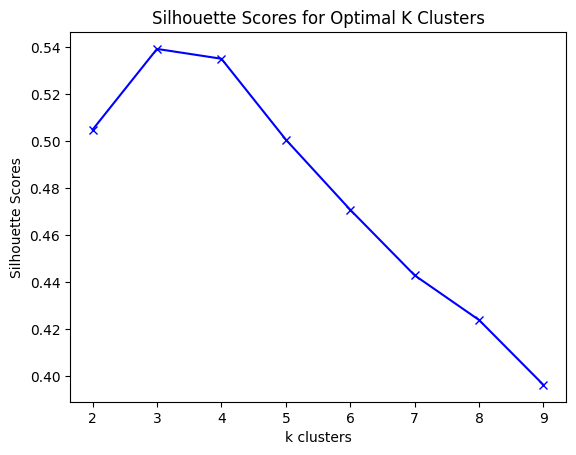

In [47]:
plt.plot(range(2, 10), silhouette, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores for Optimal K Clusters')
plt.show()

## **Optimal k is 4 according to the inertia plot**

In [48]:
k_model = KMeans(n_clusters = 4, n_init = 25, random_state = 496)
k_model.fit(scaled_df_2)

KMeans(n_clusters=4, n_init=25, random_state=496)

In [49]:
# evaluate the model

evaluate = pd.Series(k_model.labels_).value_counts()
evaluate

0    3759
3    3671
1    1329
2    1241
Name: count, dtype: int64

In [50]:
# Centroids with k=4

centeroid = pd.DataFrame(k_model.cluster_centers_, columns = ['Income', 'Tenure'])
centeroid

,Income,Tenure
0,-0.460490,0.962210
1,1.324107,-0.961721
2,1.406138,0.955437
3,-0.482152,-0.960103


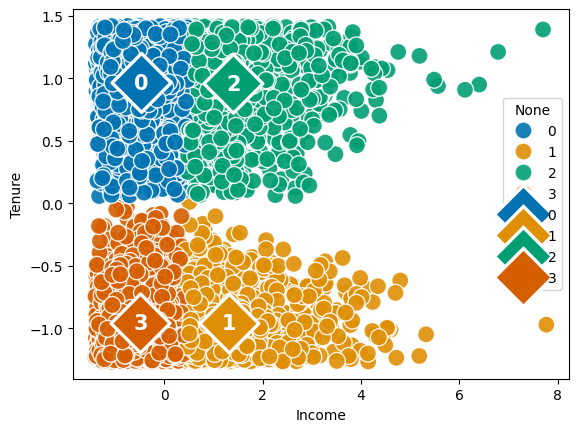

In [51]:
plt.figure()

ax = sns.scatterplot(data = scaled_df_2,
                    x = 'Income',
                    y = 'Tenure',
                    hue = k_model.labels_,
                    palette = 'colorblind',
                    alpha = 0.9,
                    s = 150,
                    legend = True)

ax = sns.scatterplot(data = centeroid,
                    x = 'Income',
                    y = 'Tenure',
                    hue = centeroid.index,
                    palette = 'colorblind',
                    s = 900,
                    marker = 'D')

for i in range(len(centeroid)):
    plt.text(x = centeroid.Income[i],
            y = centeroid.Tenure[i],
            s = i,
            horizontalalignment = 'center',
            verticalalignment = 'center',
            size = 15,
            weight = 'bold',
            color = 'white')

In [52]:
df_2['Cluster'] = k_model.labels_.tolist()
df_2.head()

C:\Users\kaili\AppData\Local\Temp\ipykernel_19120\2841564390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Cluster'] = k_model.labels_.tolist()


,Income,Tenure,Children,Age,MonthlyCharge,Marital,Gender,Churn,Contract,Cluster
0,28561.99,6.795513,0,68,172.455519,Widowed,Male,No,One year,3
1,21704.77,1.156681,1,27,242.632554,Married,Female,Yes,Month-to-month,3
2,9609.57,15.754144,4,50,159.947583,Widowed,Female,No,Two Year,3
3,18925.23,17.087227,1,48,119.956840,Married,Male,No,Two Year,3
4,40074.19,1.670972,0,83,149.948316,Separated,Male,Yes,Month-to-month,3


In [53]:
df_cust = pd.get_dummies(df_2, columns = ['Marital', 'Gender', 'Churn', 'Contract'])
df_cust.head()

,Income,Tenure,Children,Age,MonthlyCharge,Cluster,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Churn_No,Churn_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year
0,28561.99,6.795513,0,68,172.455519,3,False,False,False,False,True,False,True,False,True,False,False,True,False
1,21704.77,1.156681,1,27,242.632554,3,False,True,False,False,False,True,False,False,False,True,True,False,False
2,9609.57,15.754144,4,50,159.947583,3,False,False,False,False,True,True,False,False,True,False,False,False,True
3,18925.23,17.087227,1,48,119.956840,3,False,True,False,False,False,False,True,False,True,False,False,False,True
4,40074.19,1.670972,0,83,149.948316,3,False,False,False,True,False,False,True,False,False,True,True,False,False


In [54]:
df_cust.dtypes

Income                     float64
Tenure                     float64
Children                     int64
Age                          int64
MonthlyCharge              float64
Cluster                      int64
Marital_Divorced              bool
Marital_Married               bool
Marital_Never Married         bool
Marital_Separated             bool
Marital_Widowed               bool
Gender_Female                 bool
Gender_Male                   bool
Gender_Nonbinary              bool
Churn_No                      bool
Churn_Yes                     bool
Contract_Month-to-month       bool
Contract_One year             bool
Contract_Two Year             bool
dtype: object

In [55]:
df_cust['Marital_Divorced'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df_cust['Marital_Married'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df_cust['Marital_Never Married'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df_cust['Marital_Separated'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df_cust['Marital_Widowed'].replace({
    False : 0, 
    True : 1
}, inplace=True)

In [56]:
df_cust['Gender_Female'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df_cust['Gender_Male'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df_cust['Gender_Nonbinary'].replace({
    False : 0, 
    True : 1
}, inplace=True)

In [57]:
df_cust['Churn_No'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df_cust['Churn_Yes'].replace({
    False : 0, 
    True : 1
}, inplace=True)

In [58]:
df_cust['Contract_Month-to-month'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df_cust['Contract_One year'].replace({
    False : 0, 
    True : 1
}, inplace=True)

df_cust['Contract_Two Year'].replace({
    False : 0, 
    True : 1
}, inplace=True)

In [59]:
df_cust.head()

,Income,Tenure,Children,Age,MonthlyCharge,Cluster,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Churn_No,Churn_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year
0,28561.99,6.795513,0,68,172.455519,3,0,0,0,0,1,0,1,0,1,0,0,1,0
1,21704.77,1.156681,1,27,242.632554,3,0,1,0,0,0,1,0,0,0,1,1,0,0
2,9609.57,15.754144,4,50,159.947583,3,0,0,0,0,1,1,0,0,1,0,0,0,1
3,18925.23,17.087227,1,48,119.956840,3,0,1,0,0,0,0,1,0,1,0,0,0,1
4,40074.19,1.670972,0,83,149.948316,3,0,0,0,1,0,0,1,0,0,1,1,0,0


In [60]:
df_cust.dtypes

Income                     float64
Tenure                     float64
Children                     int64
Age                          int64
MonthlyCharge              float64
Cluster                      int64
Marital_Divorced             int64
Marital_Married              int64
Marital_Never Married        int64
Marital_Separated            int64
Marital_Widowed              int64
Gender_Female                int64
Gender_Male                  int64
Gender_Nonbinary             int64
Churn_No                     int64
Churn_Yes                    int64
Contract_Month-to-month      int64
Contract_One year            int64
Contract_Two Year            int64
dtype: object

In [61]:
df_cust.groupby('Cluster').agg({
    'Income' : 'median',
    'Tenure' : 'median',
    'Children' : 'median',
    'Age' : 'median',
    'MonthlyCharge' : 'median',
    'Marital_Divorced' : 'mean',
    'Marital_Married' : 'mean',
    'Marital_Never Married' : 'mean',
    'Marital_Separated' : 'mean',
    'Marital_Widowed' : 'mean',
    'Gender_Female' : 'mean',
    'Gender_Male' : 'mean',
    'Gender_Nonbinary' : 'mean',
    'Churn_No' : 'mean',
    'Churn_Yes' : 'mean',
    'Contract_Month-to-month' : 'mean',
    'Contract_One year' : 'mean',
    'Contract_Two Year' : 'mean'
})

,Income,Tenure,Children,Age,MonthlyCharge,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Churn_No,Churn_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year
Cluster,,,,,,,,,,,,,,,,,,
0,25834.35,61.510350,1.0,53.0,167.456400,0.208034,0.187018,0.196861,0.208300,0.199787,0.505720,0.475126,0.019154,0.944400,0.055600,0.540303,0.206970,0.252727
1,70321.71,8.000279,2.0,52.0,167.456400,0.217457,0.193378,0.188111,0.198646,0.202408,0.528969,0.445448,0.025583,0.515425,0.484575,0.558315,0.212942,0.228743
2,72518.47,61.293580,1.0,55.0,164.967000,0.199839,0.209508,0.195810,0.189363,0.205479,0.522965,0.452055,0.024980,0.940371,0.059629,0.536664,0.211926,0.251410
3,25560.03,7.895618,1.0,53.0,169.937833,0.210569,0.188232,0.196949,0.199401,0.204849,0.482702,0.491692,0.025606,0.530646,0.469354,0.549442,0.211931,0.238627


In [62]:
df_cust.groupby('Cluster').agg({
    'Income' : 'median',
    'Tenure' : 'median',
    'Marital_Divorced' : 'mean',
    'Marital_Married' : 'mean',
    'Marital_Never Married' : 'mean',
    'Marital_Separated' : 'mean',
    'Marital_Widowed' : 'mean'
    
})

,Income,Tenure,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed
Cluster,,,,,,,
0,25834.35,61.510350,0.208034,0.187018,0.196861,0.208300,0.199787
1,70321.71,8.000279,0.217457,0.193378,0.188111,0.198646,0.202408
2,72518.47,61.293580,0.199839,0.209508,0.195810,0.189363,0.205479
3,25560.03,7.895618,0.210569,0.188232,0.196949,0.199401,0.204849


In [63]:
df_cust.groupby('Cluster').agg({
    'Income' : 'median',
    'Tenure' : 'median',
    
    'Gender_Female' : 'mean',
    'Gender_Male' : 'mean',
    'Gender_Nonbinary' : 'mean'
    
})

,Income,Tenure,Gender_Female,Gender_Male,Gender_Nonbinary
Cluster,,,,,
0,25834.35,61.510350,0.505720,0.475126,0.019154
1,70321.71,8.000279,0.528969,0.445448,0.025583
2,72518.47,61.293580,0.522965,0.452055,0.024980
3,25560.03,7.895618,0.482702,0.491692,0.025606


In [64]:
df_cust.groupby('Cluster').agg({
    'Income' : 'median',
    'Tenure' : 'median',
    
    'Churn_No' : 'mean',
    'Churn_Yes' : 'mean'
    
})

,Income,Tenure,Churn_No,Churn_Yes
Cluster,,,,
0,25834.35,61.510350,0.944400,0.055600
1,70321.71,8.000279,0.515425,0.484575
2,72518.47,61.293580,0.940371,0.059629
3,25560.03,7.895618,0.530646,0.469354


In [65]:
df_cust.groupby('Cluster').agg({
    'Income' : 'median',
    'Tenure' : 'median',
    
    'Contract_Month-to-month' : 'mean',
    'Contract_One year' : 'mean',
    'Contract_Two Year' : 'mean'
})

,Income,Tenure,Contract_Month-to-month,Contract_One year,Contract_Two Year
Cluster,,,,,
0,25834.35,61.510350,0.540303,0.206970,0.252727
1,70321.71,8.000279,0.558315,0.212942,0.228743
2,72518.47,61.293580,0.536664,0.211926,0.251410
3,25560.03,7.895618,0.549442,0.211931,0.238627


In [66]:
df_cust.to_csv('customers grouped by cluster - income and tenure.csv', index=False)